Jonatan Baumgartner

Massimo De Santis

Florian Feuillade

# Load MNIST digit dataset

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
data = pd.read_csv('mnist_train.csv')
X = data.drop('label', axis=1).values.reshape(-1,28,28)
y = data['label'].values

# Visualize the images of some digits of the MNIST database

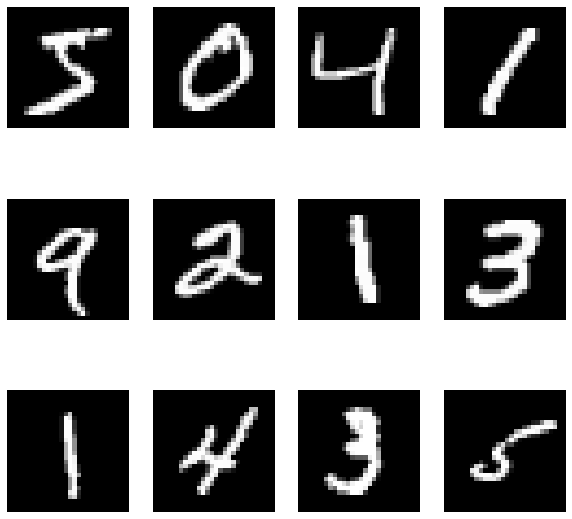

In [3]:
for i in range(4):
    for j in range(3):
        plt.subplot(3, 4, i+j*4+1)
        plt.imshow(X[i+j*4].astype('uint8'))
        plt.axis('off')
plt.show()

# Build the final balanced training and test sets

In [4]:
X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train = []

for i in range(42000):
    X_train.append(X_train_tmp[i].flatten())
X_train = np.array(X_train)/255


X_test = []

for i in range(18000):
    X_test.append(X_test_tmp[i].flatten())
X_test = np.array(X_test)/255

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (42000, 784)
Training labels shape:  (42000,)
Test data shape:  (18000, 784)
Test labels shape:  (18000,)


# Basic SVM

In [5]:
clf = svm.SVC()
clf.fit(X_train, y_train) 

SVC()

In [6]:
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))

[[1755    1    4    1    1    0    8    0    5    2]
 [   1 1998    7    5    2    1    0    2    5    2]
 [   7    4 1744    3    4    0    4    9   10    2]
 [   1    0   15 1775    2   14    0   13   14    5]
 [   3    2    9    0 1710    0    4    7    0   18]
 [   9    1    3   16    5 1574   10    0    6    2]
 [   6    1    2    0    3    6 1756    0    1    0]
 [   2    6    5    3   11    1    0 1835    2   15]
 [   5    8    4   11    5   12    6    2 1700    2]
 [   4    3    0    9   20    4    0   18    5 1722]]


In [7]:
print(accuracy_score(y_test, y_predict))

0.9760555555555556


# Linéaire

In [8]:
params = {'C': [1, 10, 100, 1000], 
          'kernel': ['linear']}


svc = svm.SVC()
clf = GridSearchCV(svc, params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print(clf.best_params_)
print(confusion_matrix(y_test, y_predict))

{'C': 1, 'kernel': 'linear'}
[[1727    2    5    7    1   11   14    2    7    1]
 [   1 1985    6    4    3    3    2    1   17    1]
 [  18   27 1654   21   13    5   11   11   21    6]
 [   6    6   35 1696    2   46    3   11   21   13]
 [   4    3   14    2 1658    3    7    6    3   53]
 [  21    4   10   59    8 1461   22    2   28   11]
 [  16    0   28    4   11   18 1694    1    3    0]
 [   7    7   20   14   23    5    1 1763    3   37]
 [  20   44   31   45    9   54    6    4 1532   10]
 [   9    9    9   16   56   10    0   60   13 1603]]


# Polynomial

In [ ]:
params = {'C': [1, 10, 100, 1000], 
          'gamma': [0.001, 0.0001], 
          'kernel': ['poly'],
          'degree': [2,3],
          'coef0': [0.0, 1.0]}

svc = svm.SVC()
clf = GridSearchCV(svc, params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print(clf.best_params_)
print(confusion_matrix(y_test, y_predict))

# RBF

In [ ]:
params = {'C': [1, 10, 100, 1000], 
          'gamma': [0.001, 0.0001], 
          'kernel': ['rbf']}

svc = svm.SVC()
clf = GridSearchCV(svc, params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print(clf.best_params_)
print(confusion_matrix(y_test, y_predict))

# Questions

- Which kernel and parameters were used ? 

 Best results where observed with ...
 
- Which digit classes are the best/worse recognized against which ? Why ? 

 yolo
 
- What is the impact of the sizes of the training and test sets on the classification performance ?

 yolo
